In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import imageio
from imageio import imread


In [2]:
def get_images(folder):
    return glob.glob(folder+"/*.j*")

In [3]:
fractals = get_images('A01_GioneeS55')
fractals = fractals[0:33]
fractals

['A01_GioneeS55\\Fractal-HDR-1.jpg',
 'A01_GioneeS55\\Fractal-HDR-10.jpg',
 'A01_GioneeS55\\Fractal-HDR-11.jpg',
 'A01_GioneeS55\\Fractal-HDR-12.jpg',
 'A01_GioneeS55\\Fractal-HDR-13.jpg',
 'A01_GioneeS55\\Fractal-HDR-2.jpg',
 'A01_GioneeS55\\Fractal-HDR-3.jpg',
 'A01_GioneeS55\\Fractal-HDR-4.jpg',
 'A01_GioneeS55\\Fractal-HDR-5.jpg',
 'A01_GioneeS55\\Fractal-HDR-6.jpg',
 'A01_GioneeS55\\Fractal-HDR-7.jpg',
 'A01_GioneeS55\\Fractal-HDR-8.jpg',
 'A01_GioneeS55\\Fractal-HDR-9.jpg',
 'A01_GioneeS55\\Fractal-SDR-1.jpg',
 'A01_GioneeS55\\Fractal-SDR-10.jpg',
 'A01_GioneeS55\\Fractal-SDR-11.jpg',
 'A01_GioneeS55\\Fractal-SDR-12.jpg',
 'A01_GioneeS55\\Fractal-SDR-13.jpg',
 'A01_GioneeS55\\Fractal-SDR-14.jpg',
 'A01_GioneeS55\\Fractal-SDR-15.jpg',
 'A01_GioneeS55\\Fractal-SDR-16.jpg',
 'A01_GioneeS55\\Fractal-SDR-17.jpg',
 'A01_GioneeS55\\Fractal-SDR-18.jpg',
 'A01_GioneeS55\\Fractal-SDR-19.jpg',
 'A01_GioneeS55\\Fractal-SDR-2.jpg',
 'A01_GioneeS55\\Fractal-SDR-20.jpg',
 'A01_GioneeS55\\Fracta

In [4]:
numbers = ['b', 'd', 'c', 'a']
numbers = sorted(numbers)

numbers

['a', 'b', 'c', 'd']

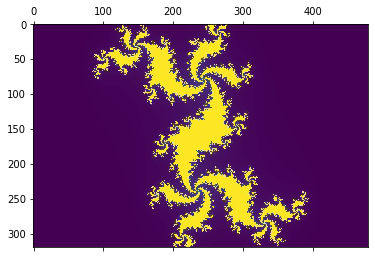

In [145]:
ex = imread(fractals[1])
ex_2 = imread(fractals[0])
plt.matshow(ex)

In [6]:
ex.shape

(320, 480, 3)

In [129]:
fractal_matrices = np.array([])
for i in range(len(fractals)):
    fractal = imread(fractals[i]).flatten()
    fractal_matrices = np.append(fractal_matrices, fractal, axis = 0)
fractal_matrices = fractal_matrices.reshape(len(fractals), len(fractal))
print(fractal_matrices.shape)
print(fractal_matrices)

(33, 460800)
[[68.  0. 83. ... 68.  0. 83.]
 [68.  0. 83. ... 68.  0. 83.]
 [68.  0. 83. ... 68.  0. 83.]
 ...
 [68.  0. 83. ... 68.  0. 83.]
 [68.  0. 83. ... 68.  0. 83.]
 [68.  0. 83. ... 68.  0. 83.]]


In [131]:
len(fractal_matrices[0])

460800

In [133]:
string = fractals[0]
string[22:25]

class_labels = np.zeros(len(fractals))
for i in range(len(fractals)):
    if fractals[i][22:25] == 'HDR':
        class_labels[i] = 1
    else:
        class_labels[i] = 0

# print(len(class_labels))
# class_labels

In [134]:
import sklearn.model_selection as model_selection

train_vectors, test_vectors, train_labels, test_labels = model_selection.train_test_split(fractal_matrices, class_labels, train_size=0.75,test_size=0.25)

print(train_vectors.shape)
print(test_vectors.shape)
print(train_labels.shape)
print(test_labels.shape)
print(type(train_vectors))

(24, 460800)
(9, 460800)
(24,)
(9,)
<class 'numpy.ndarray'>


In [135]:
###############################################################################
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time
start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Runtime 60.06945538520813


In [136]:
predict_vectors = test_vectors
true_lables = test_labels

pred_labels = clf.predict(predict_vectors)

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(2)))


              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         6
         1.0       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9

[[6 0]
 [3 0]]


C:\Users\danni\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
from sklearn.decomposition import PCA

n_components = 4

pca = PCA(n_components=n_components, whiten=True)

pca_fit = pca.fit(train_vectors)

In [139]:
pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

print("Training set changed from a size of: ", train_vectors.shape, ' to: ', pca_train_vectors.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', pca_test_vectors.shape)

Training set changed from a size of:  (24, 460800)  to:  (24, 4)
Testing set changed from a size of:  (9, 460800)  to:  (9, 4)


In [140]:
tmp_vectors = pca_train_vectors
tmp_labels = train_labels

In [141]:
rerun_training = True

start = time.time()
if rerun_training:
    
    print("Fitting the classifier to the training set")
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

#     #save the model to a file
#     pickle.dump(clf, open(filename, 'wb'))

else:
#     #read the model from a file
#     print("reading pickle file.")
#     clf = pickle.load(open(filename, 'rb'))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    
end = time.time()
print("Runtime",end - start)
    

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Runtime 0.20049428939819336


In [142]:
predict_vectors = pca_test_vectors
true_labels = test_labels

In [144]:
print("Predicting people's names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(2)))

Predicting people's names on the test set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.33      1.00      0.50         3

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9

[[0 6]
 [0 3]]


C:\Users\danni\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
